# Appendix D.1 Before handwashing policy at Vienna General, January 1841 to May 1847

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Step 1. Gather the data

In [2]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
vienna_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/impact-of-handwashing-death-to-birth-rates.csv'
# Vienna General dataset url
vienna_df = get_data(vienna_url)

# Make 'MonthYear' column dtype string
vienna_df['MonthYear'] = vienna_df['MonthYear'].astype('string')

# Show first 10 lines of vienna_df
vienna_df.columns

Index(['Hospital', 'Stage', 'Month', 'Year', 'MonthYear', 'Births', 'Deaths',
       'Rate'],
      dtype='object')

### Drop unnecessary columns from vienna_df

In [3]:
vienna_df = vienna_df[[#'Hospital', 
                       'Stage', 
                       #'Month', 
                       #'Year', 
                       'MonthYear', 
                       #'Births', 
                       #'Deaths',
                       'Rate']]
vienna_df

,Stage,MonthYear,Rate
0,Before handwashing,Jan-41,14.6
1,Before handwashing,Feb-41,7.5
2,Before handwashing,Mar-41,4.3
3,Before handwashing,Apr-41,1.6
4,Before handwashing,May-41,0.8
...,...,...,...
94,After handwashing,Nov-48,2.9
95,After handwashing,Dec-48,1.3
96,After handwashing,Jan-49,2.2
97,After handwashing,Feb-49,3.1


### Split vienna_df into before_df and after_df

In [4]:
before_df = vienna_df[vienna_df['Stage'] == 'Before handwashing'].copy()
after_df = vienna_df[vienna_df['Stage'] == 'After handwashing'].reset_index(drop=True)

## Step 2. Calculate the moving ranges

In [5]:
# Calculate the moving ranges for before_df
before_df['Moving Ranges'] = abs(before_df['Rate'].diff())
before_df

,Stage,MonthYear,Rate,Moving Ranges
0,Before handwashing,Jan-41,14.6,NaN
1,Before handwashing,Feb-41,7.5,7.1
2,Before handwashing,Mar-41,4.3,3.2
3,Before handwashing,Apr-41,1.6,2.7
4,Before handwashing,May-41,0.8,0.8
...,...,...,...,...
72,Before handwashing,Jan-47,3.2,2.2
73,Before handwashing,Feb-47,1.9,1.3
74,Before handwashing,Mar-47,3.6,1.7
75,Before handwashing,Apr-47,18.3,14.7


## Step 3. Calculate the average moving range

In [6]:
# Calculate the average moving range for before_df['Moving Ranges']
before_ave_mR = round(before_df['Moving Ranges'].mean(),2)
before_ave_mR

4.49

## Step 4. Calculate the mean

In [7]:
# Calculate the mean before_df['Rate']
before_mean = round(before_df['Rate'].mean(),2)
before_mean

10.5

## Step 5. Calculate the process limits

In [8]:
# Upper Process Limit (UPL)
before_UPL = round(before_mean + (2.660*before_ave_mR),2)
# Lower Process Limit (LPL)
before_LPL = round(before_mean - (2.660*before_ave_mR),2)
# before_LPL = max(0, before_LPL)
# Upper Process Limit (UPL)
before_URL = round(3.268*before_ave_mR,2)
# Show results
print('UPL', before_UPL)
print('LPL', before_LPL)
print('URL', before_URL)

UPL 22.44
LPL -1.44
URL 14.67


## Step 6. Put it all together

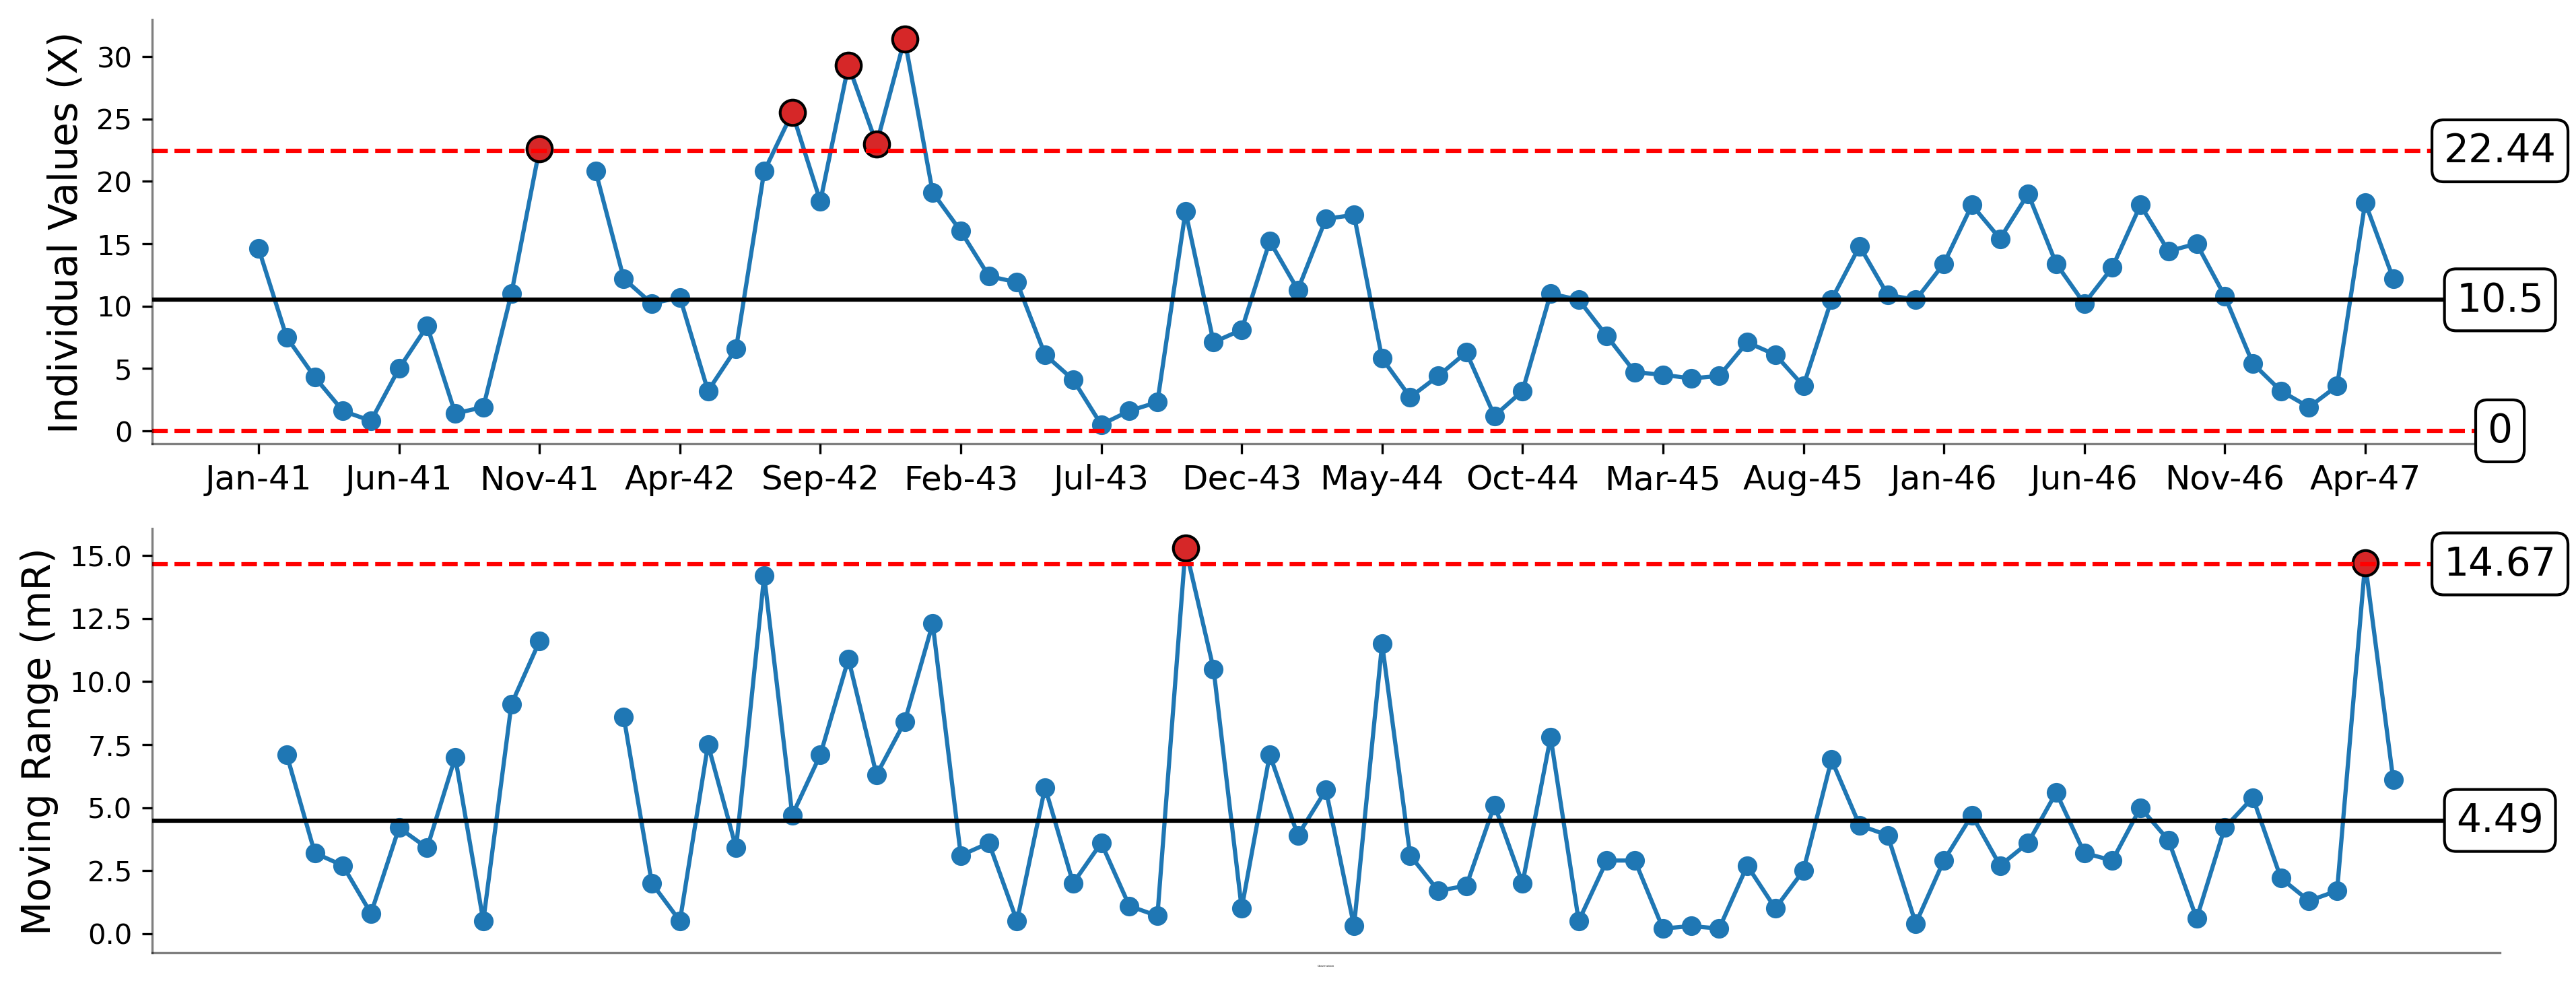

In [10]:
before_results = xmr.xmr_chart(before_df,
                                'Rate',
                                'MonthYear',
                                tickinterval=5, 
                                round_value=2, 
                                label_fontsize=14,
                                xtick_fontsize=12)